# 人工智能与催化化学

- 2024.04.24
- 祁鹤翔

## 什么是人工智能

人工智能技术一直以来都是社会关注的热点技术之一，当我们提到人工智能这一概念的时候，背后涉及到的技术体系通常是错综复杂的，难以用一个统一的定义进行全面的描述。

如果一定要给人工智能技术进行一个定义的话，作为一项软件技术，人工智能软件并不依靠人工编程的方式来解决问题，而是学习既有的经验建立模型来解决的。根据人工智能可以解决问题的领域，我们可以将人工智能进一步划分为：

- 弱的人工智能：这类人工智能技术只能用于解决特定类别的问题，例如象棋AI、围棋AI、智能抠图、语音识别等技术
- 强的人工智能：强人工智能又称通用人工智能技术，一般认为这类人工智能已经具备了和人类类似的认知、推理和决策的能力，目前热门的大语言模型（LLM）就属于这一范畴。

那么，我们为什么需要使用人工智能呢？

## 为什么研究和发展人工智能

- 哲学/自然科学上的探索
- 科学问题求解范式的演化

科学问题的求解范式：

- 经验归纳
- 理论建模
- 计算模拟
- 数据探索（？）

## 三门开奖问题

假设我们参加一个抽奖活动，规则如下：

- 有A、B、C三扇门，其中一扇门背后藏有奖品
- 当参与者选定其中一扇门后，活动的主持者会打开另外两扇门中没有奖品的一扇门
- 此时，参与者可以选择是否要更换选中的门，然后开奖

在第三步时，更换选中的门会使得中奖几率更大吗？

![三门问题](./3doors.png)

通常而言，我们如果参加一个临时的这样的活动，大多是根据自己的经验或者感觉来判断的，例如“我感觉更换会运气好”、“我第一次做出的判断大多是正确的”这样的经验，但实际上这些经验在这个单次的问题中并没有什么实际的参考价值。

如果我们采用理论建模的方式来推导的话，在第一步，我们抽中有奖的门的概率时1/3，没有抽中的概率是2/3:

- 那么更换门时中奖的期望为：$1/3*0+2/3*1=2/3$
- 而选择不换门的中将期望则为$1/3*1+2/3*0=1/3$

显然，更换门的中奖期望更大。不过，如果该活动更复杂一些，例如有更多的门的情形，理论推理就没有这么简单了。在现代高速计算机的辅助下，我们可以采用仿真方法来解决。

In [13]:
import random

def door_prize(init_choice: int, change_door: bool) -> bool:
    prize = random.randint(0, 2) # 随机分配奖品位置
    doors = [0,1,2] # 生成0，1，2三个门
    doors_can_open_by_host = [door for door in doors if door not in [prize, init_choice]] # 除去初始选中的门和有奖品的门，剩下的门可能被主持人打开
    door_open_by_host = doors_can_open_by_host[random.randint(0, len(doors_can_open_by_host) - 1)] # 选择主持人要打开的门
    doors.remove(door_open_by_host) # 打开没有奖品的门
    final_choice = [door for door in doors if door != init_choice][0] if change_door else init_choice # 根据策略更换/不更换选择的门
    return prize == final_choice # 判断是否获奖

In [14]:
change_and_win = 0
for i in range(0,1000):
    if door_prize(random.randint(0,2), True):
        change_and_win += 1

print(f"在1000次测试中，更换门获奖次数为{change_and_win}")

在1000次测试中，更换门获奖次数为672


In [15]:
unchange_and_win = 0
for i in range(0,1000):
    if door_prize(random.randint(0,2), False):
        unchange_and_win += 1

print(f"在1000次测试中，不更换门获奖次数为{unchange_and_win}")

在1000次测试中，不更换门获奖次数为316


我们没有讨论初始选择的门序号的影响，但是可以很简单的通过理论验证和计算模拟发现它并不影响结果。

## 构建智能体

那么，如果我们想要构建一个“人工智能”，希望它能够自行“总结经验”并最终得到一个最优的结论，我们应该如何做呢？

逻辑推理实际上是非常复杂的事情，而最简单的智能模拟则更多是从经验上出发的。生物大多会选择经验上更加优势的选择，我们的“简单人工智能”也是这样：

第10轮的换门倾向性为：83.33333333333334%
第20轮的换门倾向性为：90.9090909090909%
第30轮的换门倾向性为：88.23529411764706%
第40轮的换门倾向性为：91.30434782608695%
第50轮的换门倾向性为：93.54838709677419%
第60轮的换门倾向性为：94.5945945945946%
第70轮的换门倾向性为：95.45454545454545%
第80轮的换门倾向性为：96.07843137254902%
第90轮的换门倾向性为：96.66666666666667%
第100轮的换门倾向性为：96.92307692307692%
第110轮的换门倾向性为：97.2972972972973%
第120轮的换门倾向性为：97.5609756097561%
第130轮的换门倾向性为：97.72727272727273%
第140轮的换门倾向性为：97.82608695652173%
第150轮的换门倾向性为：98.01980198019803%
第160轮的换门倾向性为：98.18181818181819%
第170轮的换门倾向性为：98.30508474576271%
第180轮的换门倾向性为：98.3739837398374%
第190轮的换门倾向性为：98.44961240310077%
第200轮的换门倾向性为：98.51851851851852%


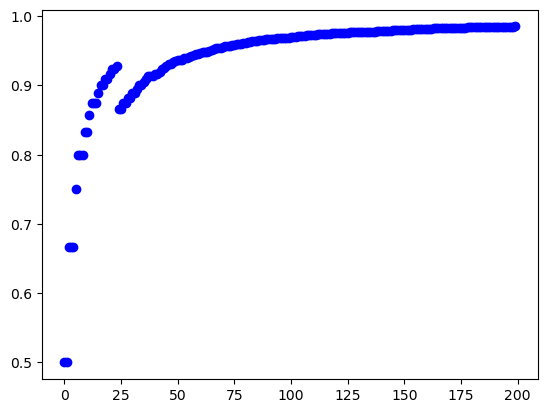

In [16]:
import matplotlib.pyplot as plt

change_and_win = 1
unchange_and_win = 1

for i in range(0, 200):
    division_point = change_and_win / (change_and_win + unchange_and_win)
    choice = random.random()
    change_door = choice <= division_point
    result = door_prize(1, change_door)
    if result and change_door:
        change_and_win += 1
    if result and not change_door:
        unchange_and_win += 1
    if i % 10 == 9:
        print(f"第{i+1}轮的换门倾向性为：{division_point*100}%")
    plt.scatter(i, division_point, c="b")

plt.show()

在这个例子中，我们实际上只控制了一个1bit的二进制变量（是/否换门），该过程实际上也只受到该变量的影响。

实际场景下，我们可能会遇到一些难以建模、难以计算模拟的问题，例如：

- 股市的预测
- 物体的识别
- 催化剂性能的预测
- ……

针对这类问题，传统提到的范式或许能够从某些方面对问题进行解答，但这些问题实际上受到大量变量错综复杂的影响，最终建立的理论模型可能只能在极小的范围内应用，而计算仿真则需要支付极大的计算代价。